# About Dataset

**"You have a telecom firm which has collected data of all its customers" The main types of attributes are : 1.Demographics (age, gender etc.) 2.Services availed (internet packs purchased, special offers etc) 3.Expenses (amount of recharge done per month etc.) Based on all this past information, you want to build a model which will predict whether a particular customer will churn or not. So the variable of interest, i.e. the target variable here is ‘Churn’ which will tell us whether or not a particular customer has churned. It is a binary variable 1 means that the customer has churned and 0 means the customer has not churned. With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not**

# Predicting the dataset using naive_bayes 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
data = pd.read_csv('C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\\Kaggle data set\\churn_data.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Unnamed: 13,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,NaN,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,NaN,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,NaN,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,NaN,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,NaN,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Unnamed: 13,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7037,2569-WGERO,Female,0,No,No,No,No,No internet service,No internet service,No internet service,...,No internet service,NaN,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,...,Yes,NaN,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,NaN,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,...,No,NaN,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Fiber optic,No,No,No,...,No,NaN,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   gender            7042 non-null   object 
 2   SeniorCitizen     7042 non-null   int64  
 3   Partner           7042 non-null   object 
 4   Dependents        7042 non-null   object 
 5   MultipleLines     7042 non-null   object 
 6   InternetService   7042 non-null   object 
 7   OnlineSecurity    7042 non-null   object 
 8   OnlineBackup      7042 non-null   object 
 9   DeviceProtection  7042 non-null   object 
 10  TechSupport       7042 non-null   object 
 11  StreamingTV       7042 non-null   object 
 12  StreamingMovies   7042 non-null   object 
 13  Unnamed: 13       0 non-null      float64
 14  tenure            7042 non-null   int64  
 15  PhoneService      7042 non-null   object 
 16  Contract          7042 non-null   object 


In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Unnamed: 13', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Unnamed: 13,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7042,7042,7042.000000,7042,7042,7042,7042,7042,7042,7042,...,7042,0.0,7042.000000,7042,7042,7042,7042,7042.000000,7042,7042
unique,7042,2,NaN,2,2,3,3,3,3,3,...,3,NaN,NaN,2,3,2,4,NaN,6530,2
top,7590-VHVEG,Male,NaN,No,No,No,Fiber optic,No,No,No,...,No,NaN,NaN,Yes,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3554,NaN,3640,4932,3389,3095,3498,3087,3095,...,2785,NaN,NaN,6360,3875,4170,2365,NaN,11,5173
mean,NaN,NaN,0.162170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32.366373,NaN,NaN,NaN,NaN,64.755886,NaN,NaN
std,NaN,NaN,0.368633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24.557955,NaN,NaN,NaN,NaN,30.088238,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


**We have droped customerID & Unnamed: 13 column beacause it will not impact on churn**

In [8]:
data = data.drop('customerID', axis=1)


In [23]:
data =data.drop('Unnamed: 13',axis=1)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7042 non-null   int32  
 1   SeniorCitizen     7042 non-null   float64
 2   Partner           7042 non-null   int32  
 3   Dependents        7042 non-null   int32  
 4   MultipleLines     7042 non-null   int32  
 5   InternetService   7042 non-null   int32  
 6   OnlineSecurity    7042 non-null   int32  
 7   OnlineBackup      7042 non-null   int32  
 8   DeviceProtection  7042 non-null   int32  
 9   TechSupport       7042 non-null   int32  
 10  StreamingTV       7042 non-null   int32  
 11  StreamingMovies   7042 non-null   int32  
 12  tenure            7042 non-null   float64
 13  PhoneService      7042 non-null   int32  
 14  Contract          7042 non-null   int32  
 15  PaperlessBilling  7042 non-null   int32  
 16  PaymentMethod     7042 non-null   int32  


In [25]:
# Lets check the dimension of the data set
data.shape

(7042, 20)

# Missing Value Detection and Treatment
The following values in a data set are considered to be missing values -
* Blank Values
* NAN
* null
* Some countinuous columns might have 0's to indicate missing data

In [26]:
# Encode categorical variables as numerical values
encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = encoder.fit_transform(data[column])

In [27]:
#checking for any object is there in attribute or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7042 non-null   int32  
 1   SeniorCitizen     7042 non-null   float64
 2   Partner           7042 non-null   int32  
 3   Dependents        7042 non-null   int32  
 4   MultipleLines     7042 non-null   int32  
 5   InternetService   7042 non-null   int32  
 6   OnlineSecurity    7042 non-null   int32  
 7   OnlineBackup      7042 non-null   int32  
 8   DeviceProtection  7042 non-null   int32  
 9   TechSupport       7042 non-null   int32  
 10  StreamingTV       7042 non-null   int32  
 11  StreamingMovies   7042 non-null   int32  
 12  tenure            7042 non-null   float64
 13  PhoneService      7042 non-null   int32  
 14  Contract          7042 non-null   int32  
 15  PaperlessBilling  7042 non-null   int32  
 16  PaymentMethod     7042 non-null   int32  


In [28]:
data.median()

gender                 1.00
SeniorCitizen          1.00
Partner                0.00
Dependents             0.00
MultipleLines          1.00
InternetService        1.00
OnlineSecurity         1.00
OnlineBackup           1.00
DeviceProtection       1.00
TechSupport            1.00
StreamingTV            1.00
StreamingMovies        1.00
tenure                29.00
PhoneService           1.00
Contract               0.00
PaperlessBilling       1.00
PaymentMethod          2.00
MonthlyCharges        70.35
TotalCharges        3248.50
Churn                  0.00
dtype: float64

In [29]:
# Replacing the 0's with NaN.
# The records that have 0's in columns tenure, SeniorCitizen will be replaced with NaN 
from numpy import nan
data['tenure']=data['tenure'].replace(0,np.nan)
data['SeniorCitizen']=data['SeniorCitizen'].replace(0,np.nan)


In [30]:
#Lets check if the above code has worked 
data.head()
# All the 0's have been replaced by NaN

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1.0,1,0,1,0,0,2,0,0,0,0,1.0,0,0,1,2,29.85,2505,0
1,1,1.0,0,0,0,0,2,0,2,0,0,0,34.0,1,1,0,3,56.95,1466,0
2,1,1.0,0,0,0,0,2,2,0,0,0,0,2.0,1,0,1,3,53.85,157,1
3,1,1.0,0,0,1,0,2,0,2,2,0,0,45.0,0,1,0,0,42.30,1400,0
4,0,1.0,0,0,0,1,0,0,0,0,0,0,2.0,1,0,1,2,70.70,925,1


In [31]:
# Count of NaN values in the dataset 
print(data.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [32]:
# Imputing missing values with their respective columns median
data.fillna(data.median(), inplace=True)

In [33]:
# Checking if the missing values have been imputed 
print(data.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Outlier Detection and treatment

Outlier Detection

Boxplots are a great way of detecting outliers. Once the outliers have been detected, they can be imputed with the 5th and 95th percentiles.

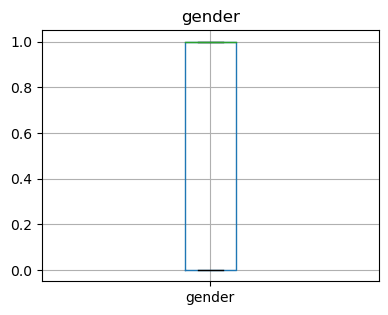

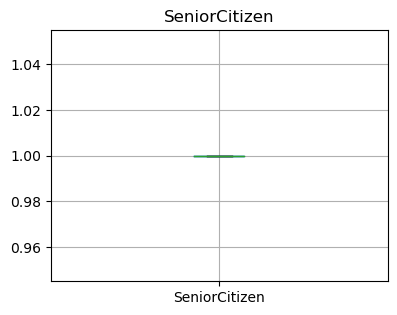

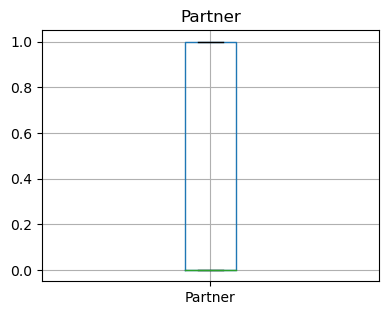

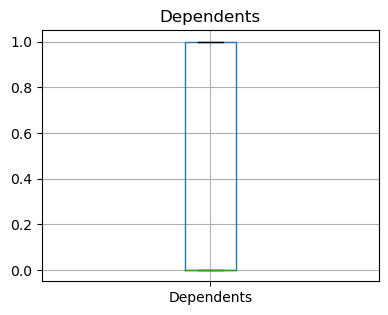

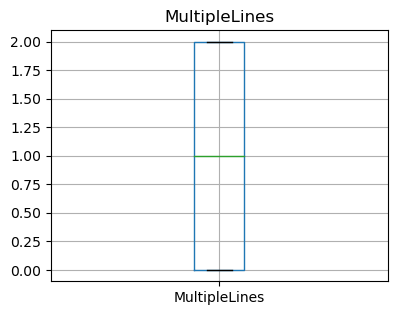

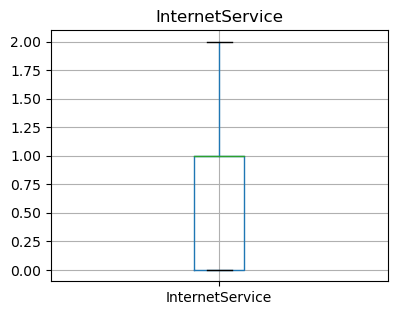

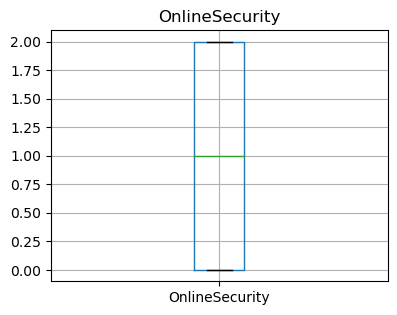

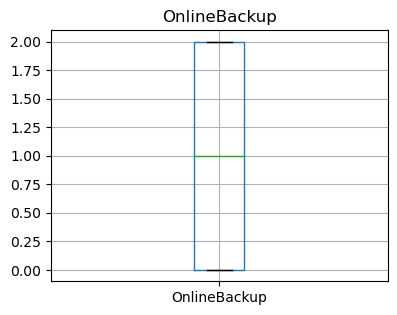

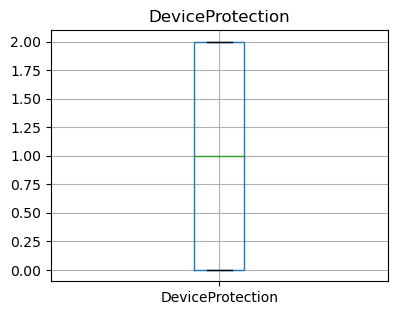

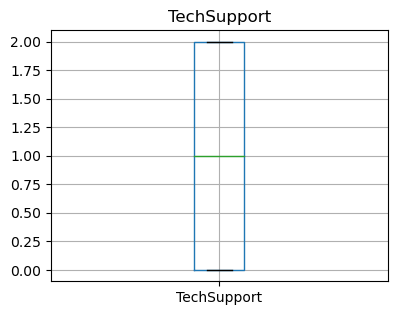

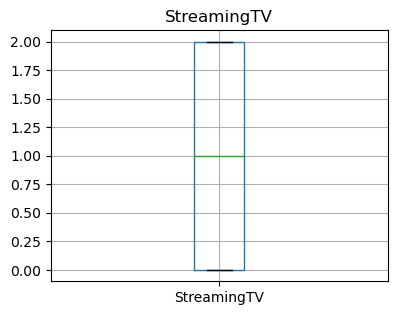

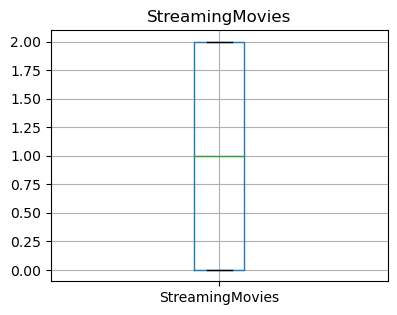

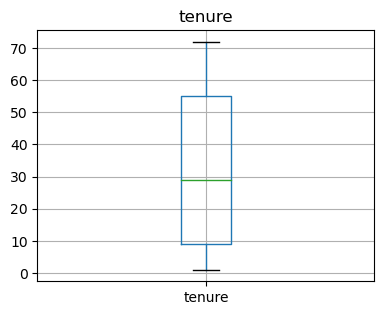

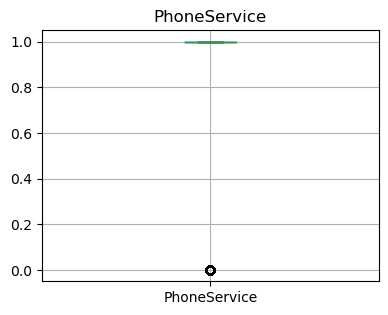

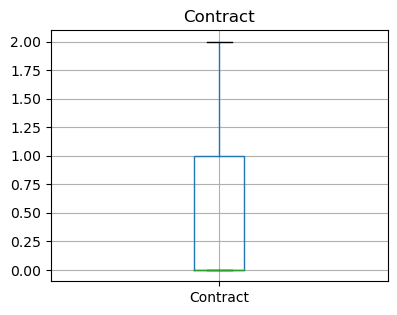

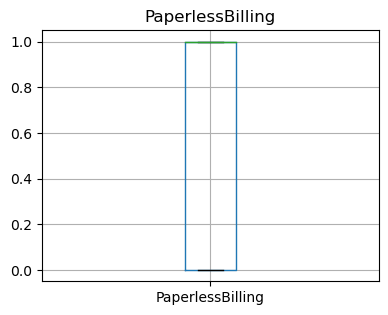

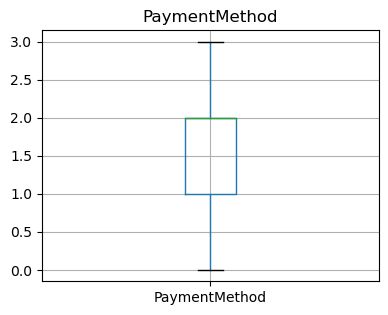

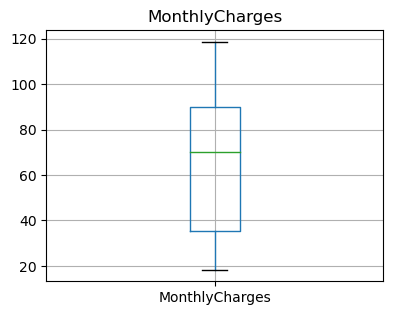

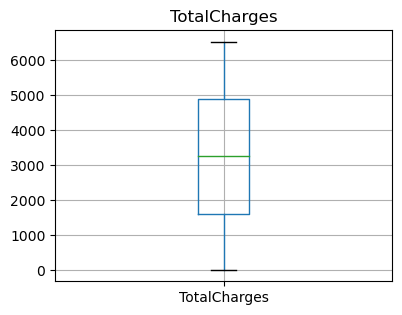

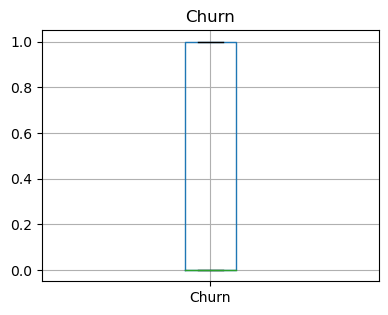

In [34]:
# Plot a boxplot for each column in the dataframe
for col in data.columns:
    plt.figure(figsize= (20,15))
    plt.subplot(4,4,3)
    data.boxplot([col])
    plt.title(col)
    plt.show()

# Data Visualisation

<AxesSubplot:xlabel='Churn', ylabel='count'>

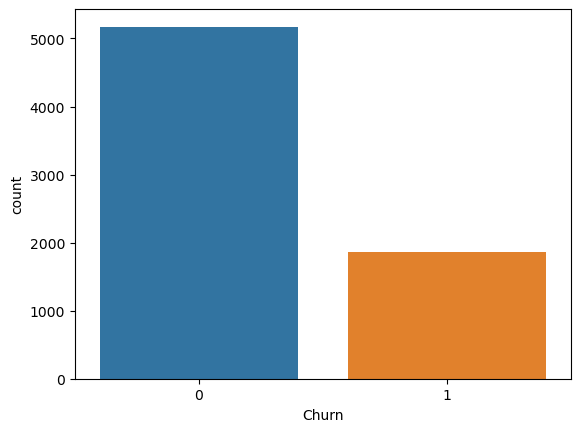

In [35]:
sns.countplot(data['Churn'])

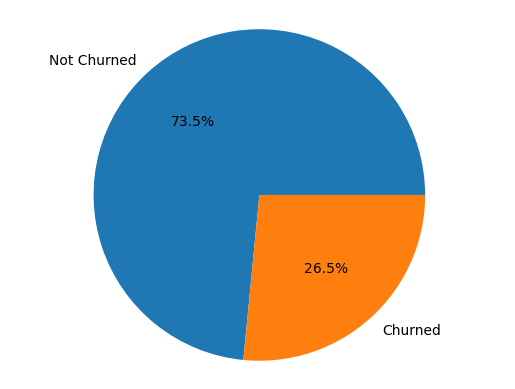

In [36]:
churn_counts = data['Churn'].value_counts()
plt.pie(churn_counts, labels=["Not Churned", "Churned"], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

* **So above in pie chart there are 73.5% Customer has not Churned**
* **And 26.5% Customer has Churned**

<AxesSubplot:>

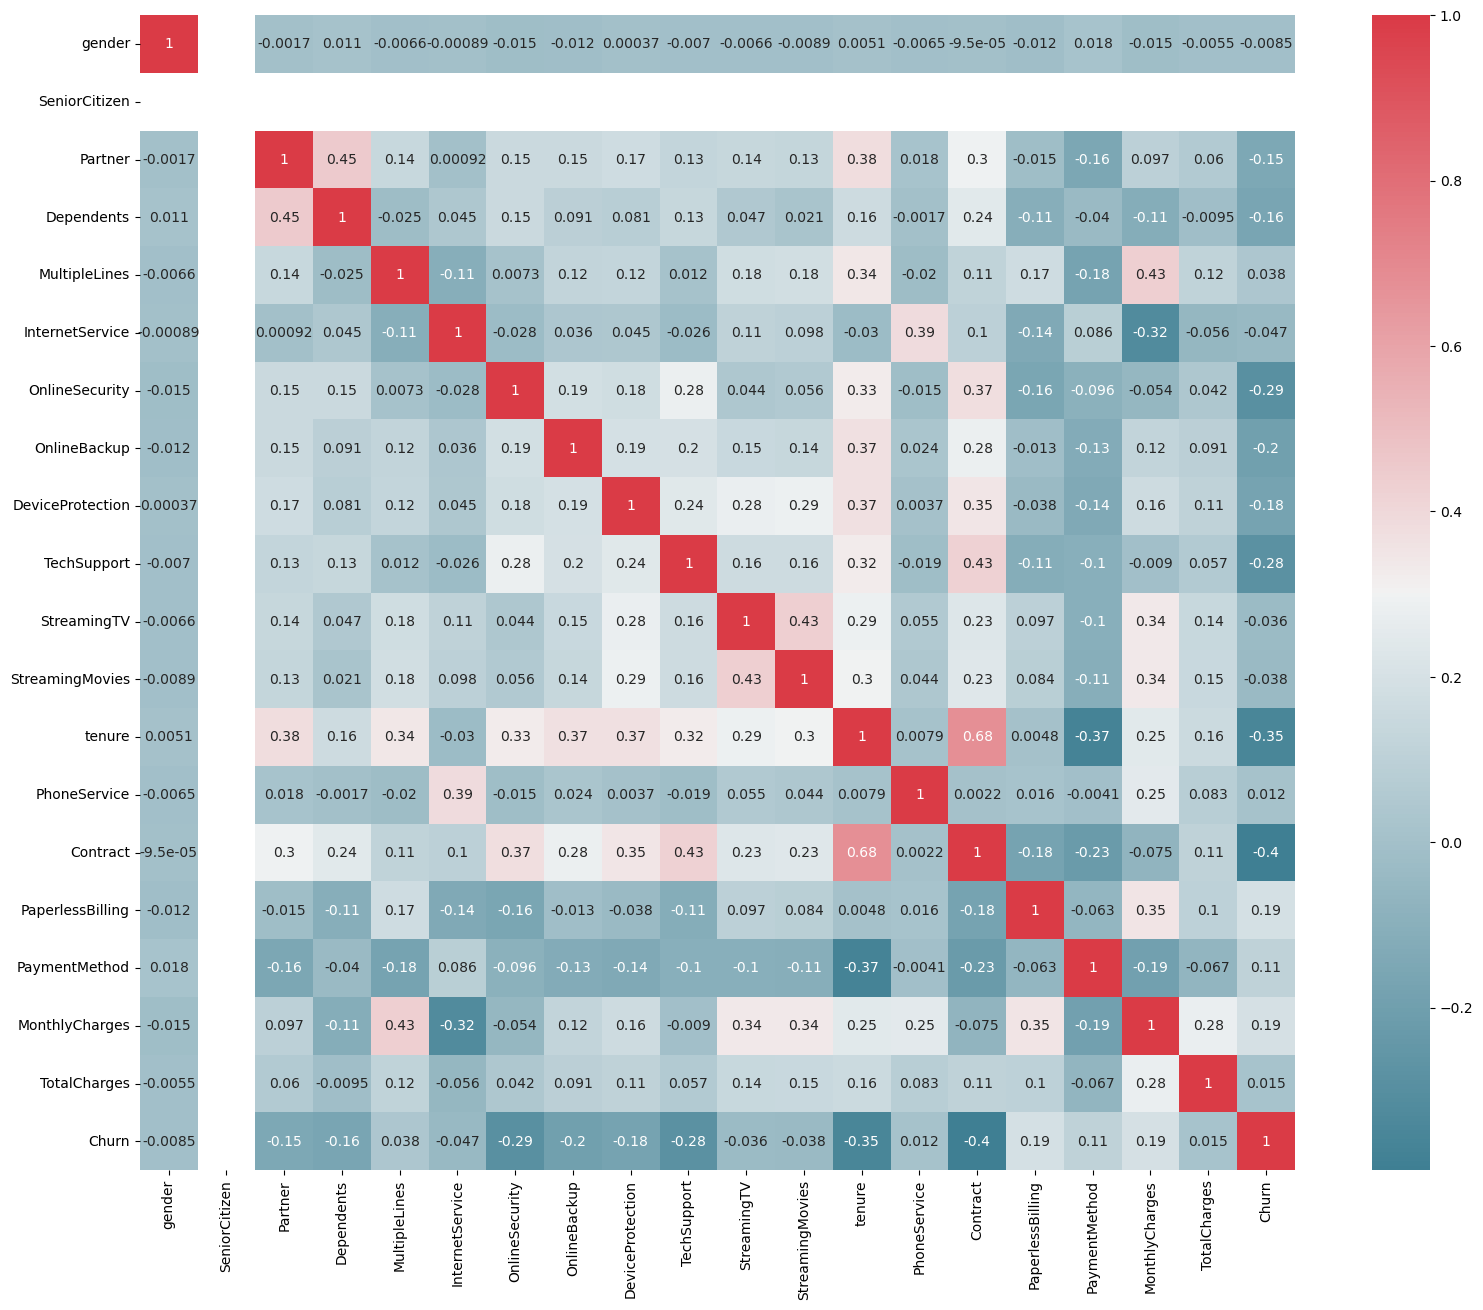

In [37]:
f, ax = plt.subplots(figsize=(20, 15))
corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

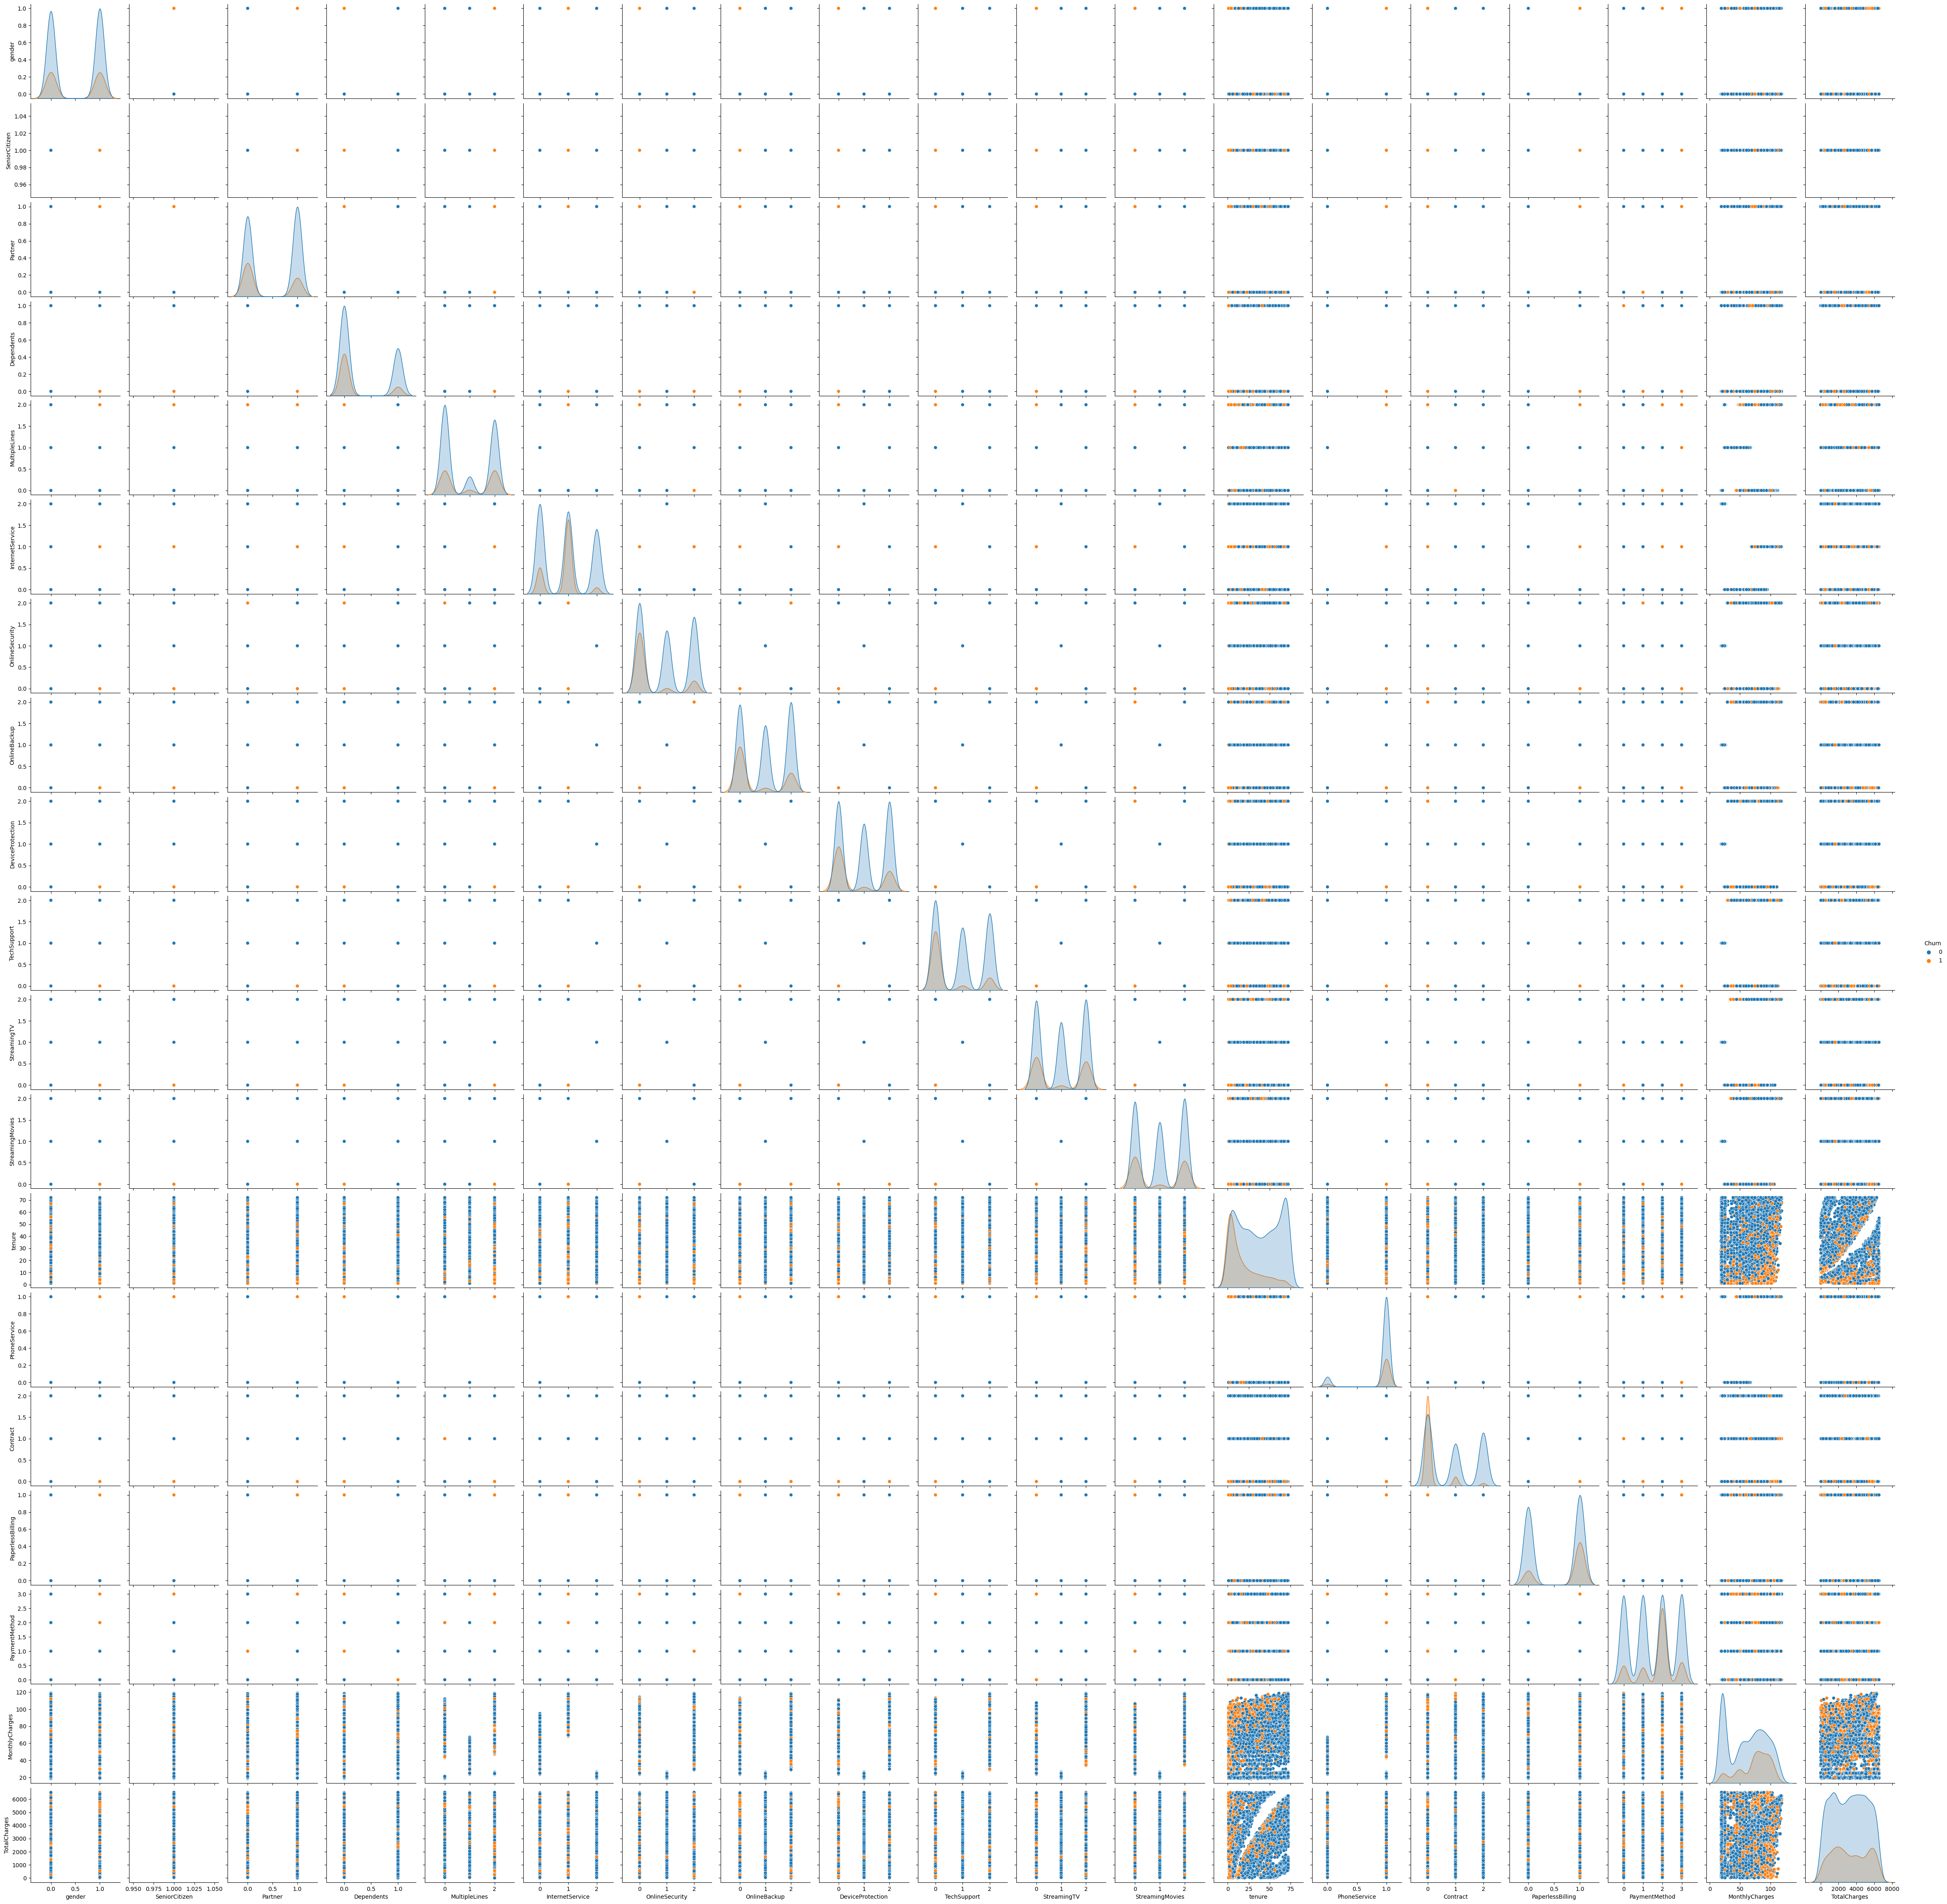

In [39]:
# Pair plot analysis 
sns.pairplot(data,hue='Churn',diag_kind='kde')

# MODEL BUILDING

In [40]:
from sklearn.model_selection import train_test_split
x= data.drop(['Churn'],axis =1)
y=data['Churn']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [41]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

In [42]:
model.fit(xTrain,yTrain)

GaussianNB()

In [43]:
predicted= model.predict(xTest)

In [44]:
print("Predicted Value:", predicted)

Predicted Value: [1 0 1 ... 1 1 1]


In [45]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yTest, predicted))

Accuracy: 0.7444996451383961


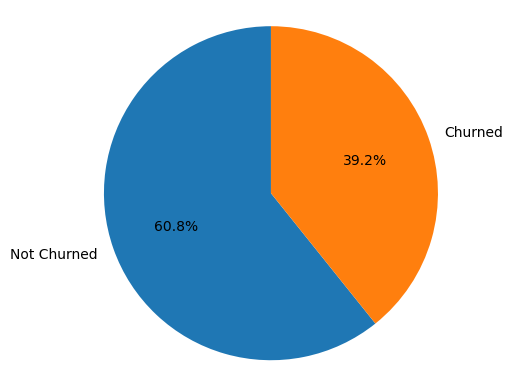

In [47]:
# Calculate the count of each outcome
unique, counts = np.unique(predicted, return_counts=True)

# Create a dictionary with the counts for each outcome
count_dict = dict(zip(unique, counts))

# Plot the pie chart
plt.pie(count_dict.values(), labels=["Not Churned", "Churned"], startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

# CONCLUSION
* **After building the GaussianNB model, it was observed that the percentage of customers who did not churn (not-churned) has decreased. The model has been trained to predict customer churn and it can be seen that the number of customers who are not churning has gone down, which suggests that the model is successful in its predictions. To improve customer retention, it is recommended to focus on the factors that are leading to customer churn and to address them proactively.**

* **This could be an indicator of an increasing number of customers leaving the company and switching to another telecom provider.**
